---

Name: Divani Rafitya
- Kaggle [Link](https://www.kaggle.com/datasets/nextmillionaire/pizza-sales-dataset)
- Tableau [Link](https://public.tableau.com/app/profile/divani.rafitya/viz/new_final_dashboard/MainDashboard?publish=yes)

---

## Business Understanding

Based on the Pizza Sales Dataset for a pizza restaurant taken from Kaggle, the data shows that the factors that affecting pizza sales are `pizza size, pizza category, and toppings on the pizza`. Therefore, we need to understand customer preferences in ordering pizza and create marketing strategies that suit these preferences if necessary, such as discounts or bundling.

Based on this background, my objective as a consultant is to analyze data from pizza sales in the previous year, which will be useful for designing strategies and making business decisions in the future.

To make it easier to carry out the analysis, the `5W1H` approach is used as a method to `understand the root cause of the problem` from various perspectives.
1. Overall, how was Pizza sales performance in 2015?
2. How many Pizzas are sold in each category?
3. Which Pizza category sold the most (best seller) in 2015?
4. What is the most sold (best seller) pizza from each pizza category?
5. Is there a correlation in the columns *pizza_id*, *order_id*, *quantity*, *unit_price*, and *total_price*?
6. Are the number of pizza sales during the day (lunchtime) different from sales at night (dinnertime)?

After elaborating the root cause of the problem, SMART goals must be define to undertand the objective:
- Specific = analyze pizza sales performance to increase sales revenue
- Measurable = increase sales by 10%
- Achievable = by understanding customer preferences for better marketing planning strategies
- Relevant = increasing sales revenue can lead to higher profit
- Time-bound = goals can be achieved within the next six months

Based on the description of SMART goals above, the objective to be achieved are:
Increase sales revenue by 10% within the next six months. This can be achieved by understanding customer preferences for better marketing planning strategies, which will lead to higher profit.

## Data Preparation

In [1]:
# setup by import library on python 
import pandas as pd
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for data visualization
from scipy import stats #for statistic calculation
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset from .csv file to pandas dataframe
df_ori = pd.read_csv('pizza_sales.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'pizza_sales.csv'

In [ ]:
# duplicate original dataset
df = df_ori.copy()

Query Data:
```sql
SELECT *
FROM `pizza_sales.csv`
```

### Data Exploration

In [ ]:
# show first 5 rows as sample
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-15,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-15,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-15,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-15,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-15,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [ ]:
# show last 5 rows as sample
df.tail()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


In [ ]:
# show dataframe summary to check non-null count and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [ ]:
# check missing value in dataset
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [ ]:
# check for duplications in dataset
df.duplicated().sum()

0

Based on the information above, the insights obtained are as follows:
- This dataset consists of 12 columns with a total of `48620 data entries`.
- There is a `data type information mismatch` in `order_date` and `order_time` columns, where the data type should be datetime, not object.
- There are no missing values ​​in the dataset because the number of non-null counts is the same as the number of data entries.
- There are no duplicate data in the dataset.

### Data Cleaning

In [ ]:
# change data type and format in column 'order_date'
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y',errors='coerce')
# using coerce to convert a variable from one data type to another, format:yyyy-mm-dd

In [ ]:
# change data type and format in column 'order_date'
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S',errors='coerce')

In [ ]:
# handling missing value on column 'order_date' with dropna
df = df.dropna(subset=['order_date'])

In [ ]:
# Change data type to integer with astype to make it easier (optional), because id and quantity are not possible in decimal form
df['pizza_id'] = df['pizza_id'].astype(int)
df['order_id'] = df['order_id'].astype(int)
df['quantity'] = df['quantity'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29033 entries, 1650 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           29033 non-null  int64         
 1   order_id           29033 non-null  int64         
 2   pizza_name_id      29033 non-null  object        
 3   quantity           29033 non-null  int64         
 4   order_date         29033 non-null  datetime64[ns]
 5   order_time         29033 non-null  datetime64[ns]
 6   unit_price         29033 non-null  float64       
 7   total_price        29033 non-null  float64       
 8   pizza_size         29033 non-null  object        
 9   pizza_category     29033 non-null  object        
 10  pizza_ingredients  29033 non-null  object        
 11  pizza_name         29033 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 2.9+ MB


In [ ]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
1650,1651,737,bbq_ckn_m,1,2015-01-13,1900-01-01 11:31:34,16.75,16.75,M,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza
1651,1652,737,thai_ckn_m,1,2015-01-13,1900-01-01 11:31:34,16.75,16.75,M,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
1652,1653,738,southw_ckn_m,1,2015-01-13,1900-01-01 12:16:47,16.75,16.75,M,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",The Southwest Chicken Pizza
1653,1654,739,big_meat_s,1,2015-01-13,1900-01-01 12:19:38,12.00,12.00,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza
1654,1655,740,cali_ckn_m,1,2015-01-13,1900-01-01 12:29:51,16.75,16.75,M,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",The California Chicken Pizza


In [ ]:
df.tail()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,1900-01-01 21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,2015-12-31,1900-01-01 21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,2015-12-31,1900-01-01 21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,2015-12-31,1900-01-01 22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620,21350,bbq_ckn_s,1,2015-12-31,1900-01-01 23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


After performing data cleaning, `df.info`, `df.head`, and `df.tail` are redisplayed to ensure that the value data types in all columns are correct.

When changing the data type in the 'order_date' column from object to datetime, it turned out that the writing format was inconsistent, thus, 'Not at Time' appeared as a missing value in that column. In this context, missing values ​​may occur because there are human error in the 'order_date' format in filling in the data entries (Missing at Random). For this reason, handling missing values ​​is carried out using `.dropna`, which the amount of data becomes `29033 data entries` after dropping.

Next, identify whether there are outliers in the data is necessary. If there are, you must handle these outliers. For this reason, simple statistical calculations will be carried out .

In [ ]:
# mean, median, and skewness calculation for column 'quantity'
print(f"Mean of quantity: {df['quantity'].mean()}",'products')
print(f"Median of quantity: {df['quantity'].median()}",'products')
print(f"Skewness of quantity: {df['quantity'].skew()}")

Mean of quantity: 1.0196672751696345 products
Median of quantity: 1.0 products
Skewness of quantity: 7.811941913097294


In [ ]:
# mean, median, and skewness calculation for column 'unit_price'
print(f"Mean of unit price: {df['unit_price'].mean()}",'products')
print(f"Median of unit price: {df['unit_price'].median()}",'products')
print(f"Skewness of unit price: {df['unit_price'].skew()}")

Mean of unit price: 16.498081493472945 products
Median of unit price: 16.5 products
Skewness of unit price: 0.15971801016420595


In [ ]:
# mean, median, and skewness calculation for column 'total_price'
print(f"Mean of total price: {df['total_price'].mean()}")
print(f"Median of total price: {df['total_price'].median()}")
print(f"Skewness of total price: {df['total_price'].skew()}")

Mean of total price: 16.826723039300106
Median of total price: 16.5
Skewness of total price: 1.7748549397732913


In statistical calculations, there is a correlation between mean, median, and skewness.
- If mean = median then the data distribution is perfectly distributed
normal.
- If  mean > median then the data distribution is positive skewed, where outliers are detected in the right side of data distribution.
- If mean < median then the data distribution is negative skewed, where outliers are detected in the left side of data distribution.

In line with this, skewness has a limit value of -0.5 and 0.5 for the normal skewed distribution and values ​​below -1 or above 1 have an extremely skewed distribution which indicates there are outliers.

Based on the results of statistical calculations, it can be seen that the data distribution in the 'unit_price' column has a normal distribution because the value is <0.5. Meanwhile, the data distribution in 'total_price' columns has an extremely positively skewed because the value is > 1. For this reason, in the cleaning stage we will handle outliers with a z-score for 'unit_price' and use Tukey's Rule for 'total_price'. Wherareas, outliers in column 'quantity' are not removed because the conditions are natural.

Based on this analysis, the outliers in the data are natural because there is the possibility that there are marketing activity factors that can increase revenue in a certain period.

In [ ]:
# handling outlier on column 'unit_price' with z-score
avg = df['unit_price'].mean()
std = df['unit_price'].std()

up_bound = avg + 3 *std
low_bound = avg - 3 *std

print(f'Upper Boundary of unit_price: {up_bound:.2f}' )
print(f'Lower Boundary of unit_price {low_bound:.2f}')

outlier_unit_price = df['unit_price'][(df['unit_price']<low_bound) | (df['unit_price']>up_bound)]
no_outlier_unit_price = df['unit_price'][(df['unit_price']>=low_bound) & (df['unit_price']<=up_bound)]

print(f"Percentage of outliers in unit_price: {len(outlier_unit_price)*100/len(df['unit_price']):.2f}%%")

Upper Boundary of unit_price: 27.42
Lower Boundary of unit_price 5.58
Percentage of outliers in unit_price: 0.08%%


In [ ]:
# handling outlier on column 'total_price' with Tukey's Rule
q1 = df['total_price'].quantile(0.25)
q3 = df['total_price'].quantile(0.75)
iqr = q3 - q1

low_bound = q1 - 1.5 * iqr
up_bound = q3 + 1.5 * iqr

print(f'Lower Boundary of total_price: {low_bound:.2f}')
print(f'Upper Boundary of total_price: {up_bound:.2f}')

outlier_total_price = df['total_price'][(df['total_price']<low_bound) | (df['total_price']>up_bound)]
no_outlier_total_price = df['total_price'][(df['total_price']>=low_bound) & (df['total_price']<=up_bound)]

print(f"Percentage of outliers in total_price: {len(outlier_total_price)*100/len(df['total_price']):.2f}%%")

Lower Boundary of total_price: 1.12
Upper Boundary of total_price: 32.12
Percentage of outliers in total_price: 1.29%%


The parameter for determining whether outlier values ​​are kept or discarded is to look at the percentage of outliers in the data in that column. If the outlier percentage result is <5% then the outlier value must be discarded, whereas if the outlier percentage result is >5% then the outlier data is not discarded. This is because if the outlier percentage < 5% data deletion will not be too affected by the data entries because the amount is relatively small, whereas too much data will be discarded if we discard data with an outlier percentage > 5% where the number of data entries will be reduced significantly.

Calculation of the outlier percentage in the 'unit_price' and 'total_price' columns shows a result of <5%, where based on the parameters above we will discard the outlier data in both columns. Then, checking skewness is carried out to see whether the outlier was successful deleted or not.

In [ ]:
# deleting outlier
df = df.loc[(df['unit_price']>=low_bound) & (df['unit_price']<=up_bound)]
df = df.loc[(df['total_price']>=low_bound) & (df['total_price']<=up_bound)]

In [ ]:
# checking data after dropping outliers in column 'unit_price'
df['unit_price'][(df['unit_price']<low_bound) | (df['unit_price']>up_bound)]

Series([], Name: unit_price, dtype: float64)

In [ ]:
# checking dataframe after dropping outliers in column 'total_price'
df['total_price'][(df['total_price']<low_bound) | (df['total_price']>up_bound)]

Series([], Name: total_price, dtype: float64)

In [ ]:
# checking skewness after dropping outlier
print(f"Skewness unit price without outlier: {df['unit_price'].skew()}")
print(f"Skewness total price price without outlier: {df['total_price'].skew()}")

Skewness unit price without outlier: 0.07107808893854793
Skewness total price price without outlier: 0.15075493755930985


In [ ]:
# reset index after cleaning
df = df.reset_index()

# dropping extra index column
df.drop('index',axis=1,inplace=True)

In [ ]:
# save cleaned file to .csv
df.to_csv('cleaned_pizza_sales.csv',index=False)

## Data Analysis

#### Initially, as a consultant I had to analyze `overall pizza sales revenue in 2015`. To achieve this, comparing sales revenue per month is necessary to see which month's sales are profitable.

In [ ]:
# create column sales revenue
df['revenue'] = df['quantity']*df['total_price']

In [ ]:
# create column 'month'
df['month'] = df['order_date'].dt.month

In [ ]:
# change month number to month name with replace
df['month'] = df['month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April',
                                5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September',
                                10: 'October', 11: 'November', 12: 'December'})

In [ ]:
# sorting month name based on the correct month order, not alphabetical
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# grouping sales revenue by month
revenue_per_month = df.groupby('month')[['revenue']].sum()
revenue_per_month = revenue_per_month.reindex(new_order,axis=0)
revenue_per_month

,revenue
month,
January,40853.80
February,36186.50
March,42818.00
April,39719.35
May,42809.15
June,39176.80
July,42554.35
August,41083.95
September,35161.15


In [ ]:
revenue_per_month.mean()

revenue    39928.745833
dtype: float64

Text(0, 0.5, 'Revenue')

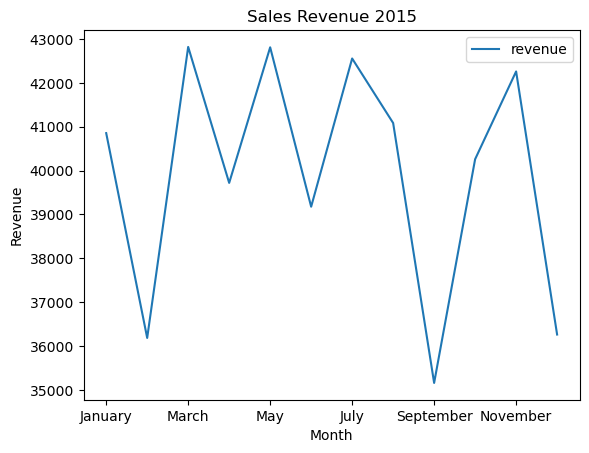

In [ ]:
# data visualization
revenue_per_month.plot(kind='line')
plt.title('Sales Revenue 2015')
plt.xlabel('Month')
plt.ylabel('Revenue')

To visualize the data, using the `line plot` visualization is appropriate because the objective is to display sales revenue trends over a certain time period, namely sales revenue in 2015 based on month.

Based on the image above, the insights obtained are as follows:
- Sales revenue tends to be fluctuating, with the average value of pizza sales are 39,928.75 dollars.
- The highest revenue occurred in March, where the revenue obtained was 42,818 dollars.
- The lowest revenue occurred in September, where the revenue obtained was 35,161.15 dollars.
- Significant increase in revenue from June to July, with a total increase in revenue of 120.2%.
- Significant consistent decrease in revenue from July to September, with a total decrease in revenue of -121%.

#### Second, I want to see `pizza sold in each category` by look at the percentage of sales based on pizza category to see customers' favorite pizza categories.

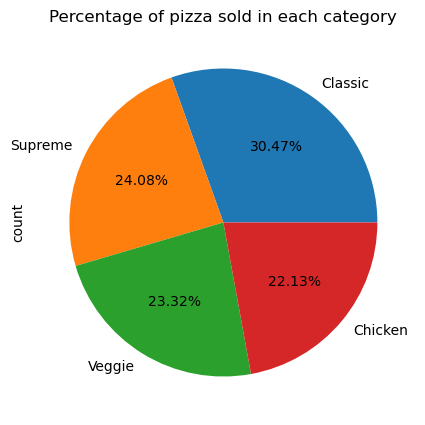

In [ ]:
# data visualization
fig,ax1 = plt.subplots(figsize=(5,5))

df['pizza_category'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.title('Percentage of pizza sold in each category')
plt.show()

To visualize the data, using a pie chart visualization is appropriate because the objective is to see what pizza categories match customer preferences and compare them with other categories. Apart from that, because the number of pizza categories is small, it is only divided into 4 categories.

Based on the image above, the insights obtained is `the difference in sales revenue on the four pizza categories  is not significant`, where the largest percentage is 30.47% from the classic pizza category and the smallest is from the chicken pizza category, which is 22.13%.

#### Thirdly, I want to analyze `which Pizza category sold the most (best seller) in 2015` by comparing the number of pizzas sold in each month based on pizza category.

In [ ]:
# grouping quantity sold per category by month
quantity_sold = df.groupby(['month','pizza_category'])[['quantity']].sum().reset_index() 
# using .reset_index() in order to read the column 'month'

In [ ]:
# convert column 'month' to categorical data type with the specified order
quantity_sold['month'] = pd.Categorical(quantity_sold['month'], categories=new_order, ordered=True)

# sort based on the new categorical order of months
quantity_sold = quantity_sold.sort_values(by='month')

# using .reset_index() in order to read the column 'month'
quantity_sold = quantity_sold.reset_index(drop=True)

# show the reordered dataframe
quantity_sold

,month,pizza_category,quantity
0,January,Veggie,586
1,January,Supreme,606
2,January,Classic,747
3,January,Chicken,541
4,February,Veggie,516
5,February,Supreme,512
6,February,Classic,659
7,February,Chicken,495
8,March,Chicken,598
9,March,Veggie,614


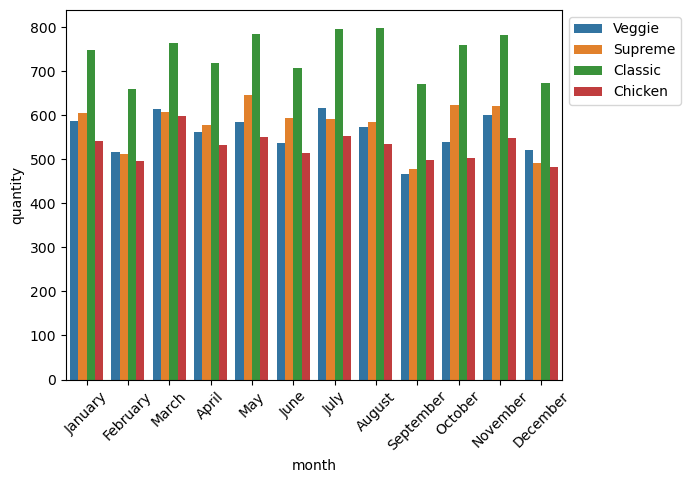

In [ ]:
# data visualization
sns.barplot(data=quantity_sold, x='month', y='quantity', hue='pizza_category')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

To visualize the data, using a bar chart visualization is appropriate because the objective is to compare the number of pizzas sold based on pizza category each month.

Based on the image above, the insights obtained are as follows:
- In line with previous insight, the classic category is the pizza category that is preferred by customers, where sales performance is always the highest every month.
- There is a pattern of customer preferences in the pizza category, with the order of pizza categories are Classic, Supreme, Veggie and Chicken.
- February, March, and July, the order of pizza categories patterns are classic, veggie, supreme, and chicken.
- August has a different pattern from other months, with the order of pizza categories being classic, chicken, supreme, veggie.

#### Next, I also want to know `which pizza is the most sold (best seller) pizza from each pizza category`.

In [ ]:
# grouping pizza name based on pizza category
best_seller_pizza = df.groupby(['pizza_category','pizza_name'])[['quantity']].sum()

# get the top 3 best-selling pizzas from each category
best_top_3 = best_seller_pizza.groupby(level=0)['quantity'].nlargest(3).reset_index(level=0, drop=True)

# show dataframe
best_top_3 = pd.DataFrame(best_top_3).reset_index()
best_top_3

,pizza_category,pizza_name,quantity
0,Chicken,The Barbecue Chicken Pizza,1381
1,Chicken,The Thai Chicken Pizza,1378
2,Chicken,The California Chicken Pizza,1341
3,Classic,The Classic Deluxe Pizza,1491
4,Classic,The Pepperoni Pizza,1433
5,Classic,The Hawaiian Pizza,1395
6,Supreme,The Sicilian Pizza,1147
7,Supreme,The Spicy Italian Pizza,1110
8,Supreme,The Italian Supreme Pizza,1044
9,Veggie,The Four Cheese Pizza,1072


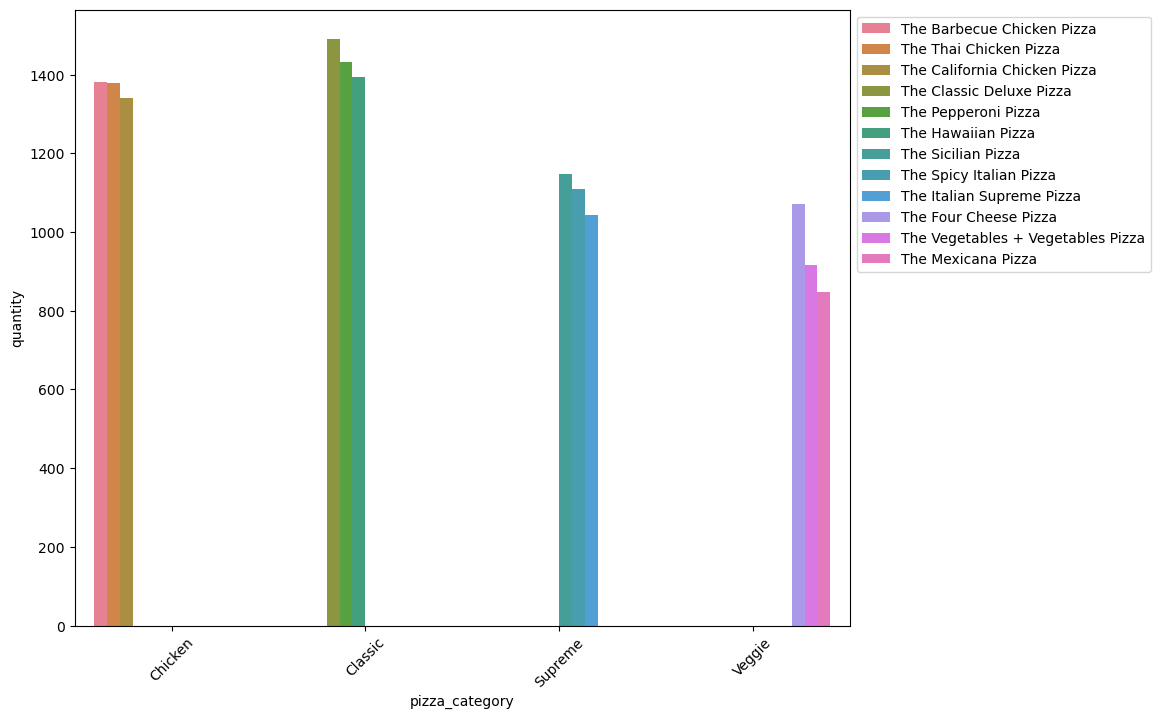

In [ ]:
# data visualization
fig,ax1 = plt.subplots(figsize=(10,8))

sns.barplot(data=best_top_3, x='pizza_category', y='quantity', hue='pizza_name')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

To visualize the data, using a bar chart visualization is appropriate because the objective is to compare the top 3 best selling pizza name from each pizza category.

Based on the image above, overall, `all top 3 best selling pizza sales comes from Classic category`, namely The Barbecue Chicken Pizza, The Thai Chicken Pizza, and The California Chicken Pizza.

#### Furthermore, I want to know `is there any correlation in column pizza_id, order_id, quantity, unit_price, and total_price` to find pattern on each column mentioned and make a comparasions.

In [ ]:
# create a table that contains numeric selection columns only
df_corr = df[['pizza_id','order_id','quantity','unit_price','total_price']]
df_corr

,pizza_id,order_id,quantity,unit_price,total_price
0,1651,737,1,16.75,16.75
1,1652,737,1,16.75,16.75
2,1653,738,1,16.75,16.75
3,1654,739,1,12.00,12.00
4,1655,740,1,16.75,16.75
...,...,...,...,...,...
28653,48616,21348,1,16.75,16.75
28654,48617,21348,1,17.95,17.95
28655,48618,21348,1,12.00,12.00
28656,48619,21349,1,20.25,20.25


In [ ]:
# checking correlation with .corr() function
df_corr.corr()

,pizza_id,order_id,quantity,unit_price,total_price
pizza_id,1.000000,0.999990,0.009836,0.002476,0.005225
order_id,0.999990,1.000000,0.009840,0.002425,0.005176
quantity,0.009836,0.009840,1.000000,-0.087348,0.202811
unit_price,0.002476,0.002425,-0.087348,1.000000,0.957072
total_price,0.005225,0.005176,0.202811,0.957072,1.000000


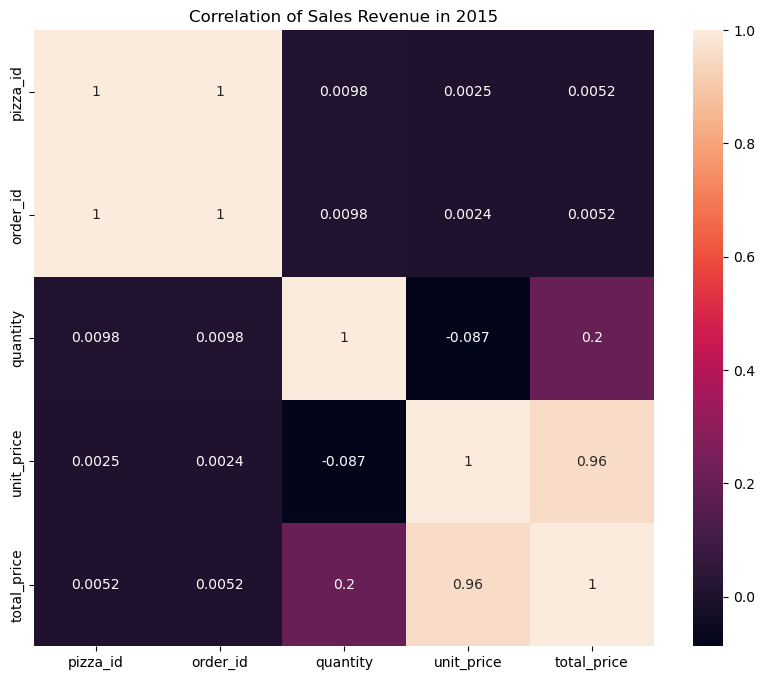

In [ ]:
# check the correlation using a heatmap
fig,ax1 = plt.subplots(figsize=(10,8))

sns.heatmap(df_corr.corr(),annot=True)
plt.title('Correlation of Sales Revenue in 2015')
plt.show()

The following are references for determining the level of correlation, where the greater the correlation the darker the color will be:
- Correlation = 0 meaning there is no correlation.
- Correlation 0.20-0.39 is considered weak.
- Correlation of 0.40-0.59 is considered moderate.
- Correlation of 0.60-0.79 is considered strong.
- Correlation of 0.80-1 is considered very strong.
If the correlation is positive, it means that the relationship is directly proportional, whereas if it is negative it will be inversely proportional.

Based on the correlation results, the insights obtained are as follows:
- unit_price and total price have a very strong positive correlation, where changes in the price per item will affect overall revenue.
- total_price and quantity have a weak positive correlation, where if there is an increase in the number of goods sold it will not have a significant effect on revenue.
- unit_price and quantity have a very weak negative correlation, where price changes do not have a significant effect on the number of products sold.

#### Lastly, hypothesis test will be carry out to know whether the number of pizza sales during the day (lunchtime) is different from sales at night (dinnertime). The purpose of this hypothesis test is to gain insight that will help determine business planning strategy decisions.

To answer this question, hypothesis test will be carry out with the following definition of hypothesis:
- 𝐻0 : The number of pizza sales during the day (lunchtime) ==  night (dinnertime)
- 𝐻1 : The number of pizza sales during the day (lunchtime) !=  night (dinnertime)

With a confidence level of 95% (critical value=0.05), then to test the truth:
- If the p-value < critical value then the result is reject H0
- If p-value > critical value then the result fails to reject H0

The type of hypothesis used is 'two sample independent test' by comparing the 'order_time' samples at lunchtime and dinnertime to find out whether there is a difference or not. Two sample test because you want to look at two different variables, namely lunchtime and dinnertime, and independent test because the lunchtime value is not affected by the dinnertime value.

In [ ]:
# perform hour extraction on column 'order_time'
df['order_hour'] = df['order_time'].dt.hour

In [ ]:
# defining lunchtime and dinnertime hours
lists = []
for i in df.order_hour:
  if i in (12,13,14):
    lists.append('lunch_time')
  elif i in (18,19,20):
    lists.append('dinner_time')
  else:
    lists.append("Order placed not during peak hours")

# create new column
df['order_placed'] = lists

In [ ]:
# perform search selection by filtering lunchtime and dinnertime
lunchtime = df[df['order_placed'].astype(str).str.startswith(('lunch_time'))][['pizza_name','quantity']].groupby(['pizza_name']).sum()
dinnertime = df[df['order_placed'].astype(str).str.startswith(('dinner_time'))][['pizza_name','quantity']].groupby(['pizza_name']).sum()

In [ ]:
# checking lunchtime data
lunchtime['quantity'].head()

pizza_name
The Barbecue Chicken Pizza      424
The Big Meat Pizza              386
The Brie Carre Pizza             94
The Calabrese Pizza             171
The California Chicken Pizza    425
Name: quantity, dtype: int64

In [ ]:
# checking dinnertime data
dinnertime['quantity'].head()

pizza_name
The Barbecue Chicken Pizza      376
The Big Meat Pizza              312
The Brie Carre Pizza             72
The Calabrese Pizza             157
The California Chicken Pizza    401
Name: quantity, dtype: int64

In [ ]:
# function to compare mean from two independent groups, whether there is a significant difference or not
t_stat,p_val = stats.ttest_ind(lunchtime['quantity'],dinnertime['quantity'])
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.05610068959535218
t-statistics: 1.9467344967874736


Based on the results of the analysis of the hypothesis test calculation above, `p-value > critical value`, with the result that the p-value is 0.56 and the critical value is 0.05. From the results of this hypothesis, it can be concluded that we `fail to reject H0` with a 95% probability that `the number of pizza sales during the day (lunchtime) and at night (dinnertime) is not significantly difference`, where the difference in pizza orders at lunchtime and dinner is only around 0.056.

## Conclusion

- The highest revenue occurred in March whereas lowest revenue occurred in September, with the value of revenue is 42,818 dollars and 35,161.15 dollars respectively.
- The difference in sales revenue on the four pizza catefories is not significant.
- Kategori classic menjadi kategori pizza favorit yang disukai oleh customer, dengan top 3 best selling pizza comes from Classic category.
- The Classic category become the most favorite pizza category that customers like with the top 3 best-selling pizzas coming from the Classic category, namely The Barbecue Chicken Pizza, The Thai Chicken Pizza, and The California Chicken Pizza.
- From the correlation results between unit_price and quantity, we can conclude that customers are not sensitive to price and are loyal. This shows that there are other factors that influence sales, such as customer preferences.
- With confidence level of 95%, the number of pizza sales during the day (lunchtime) and at night (dinnertime) is not significantly difference.

In conclusion, it is necessary to `understand customer preferences` to be able to increase revenue consistently in the next six months. Thus, because `customers are not sensitive to price`, things that must be considered to increase revenue are always be consistent that can be achieve by `maintaining the quality of food that suits customer preferences like taste, freshness, selection of ingredients, and so on` which lead to customers will remain loyal.

<!-- catatan untuk no 2
liat dari distribusi pendapatan 
terjual 100 @10k = 1jt
dari data itu liat distribusi gimana, anggap normal
min pendapatan&maks pendapatan dengan confidence level 95%
kemungkinan pendapatan jika menjual seblak adalah ??-??
dia melihat data manaaja yang masuk ke distribusi
makin kecil CI berarti makin , tapi kemungkinannya kecil
kalo CI 95% critical value 0,05
interval yang bisa kita tebak
pvalue > 0 ditolak
CL seberapa percaya kita makin tinggi makin susah pembuktiannya
CI dari data kemungkinan nilai rata2 yang sama dengan populasi berapa. nilai yang jatoh do anhka brpp

p-value pembuktian apakah nilai valid atau tidak

itungnya berdasarkan median -> colab code 38 -->

<!-- handling outlier dulu baru uji korelasi?? -->